# Explicación de regresión logística

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Octubre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook muestra la creación de modelos predictivos para variables discretas usando algoritmos de clasificación.

En este caso sólo aplica Regresión logística.


Las métricas usadas, en este caso, asociadas a clasificación son:

+ accuracy
+ matriz de confusión
+ reporte de clasificación
---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.3.2)

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import sklearn
print(sklearn.__version__)
```

# Introducción
Clasificaremos si el usuario que visita un sitio web usa como sistema operativo Windows, Mac o Linux.

Para eso, cargaremos un pequeño archivo CSV de 170 registros. La muestra es muy pequeña, por lo cual corremos el riesgo de underfitting u overfitting.

Nuestra información de entrada son 4 características tomadas de una web que utiliza Google Analytics y son:

*   Duración de la visita en Segundos
*   Cantidad de páginas vistas durante la sesión
*   Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)
*   Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:

0 – Windows
1 – Mac
2 -Linux

# Importar las librerías


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

from collections import Counter

%matplotlib inline

# Carga los datos de entrada del archivo csv


In [2]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/usuarios_win_mac_lin.csv

--2024-10-10 21:36:45--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/usuarios_win_mac_lin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2341 (2.3K) [text/plain]
Saving to: ‘usuarios_win_mac_lin.csv’

usuarios_win_mac_li 100%[===================>]   2.29K  --.-KB/s    in 0s      

2024-10-10 21:36:46 (39.3 MB/s) - ‘usuarios_win_mac_lin.csv’ saved [2341/2341]



In [3]:
data = pd.read_csv("usuarios_win_mac_lin.csv", sep=",")
data.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [5]:
data.clase = data.clase.astype("category")

In [6]:
data.describe()

,duracion,paginas,acciones,valor
count,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471
std,202.453200,1.500911,9.136054,44.751993
min,1.000000,1.000000,1.000000,1.000000
25%,11.000000,1.000000,3.000000,8.000000
50%,13.000000,2.000000,6.000000,20.000000
75%,108.000000,2.000000,10.000000,36.000000
max,898.000000,9.000000,63.000000,378.000000


In [9]:
data.describe(include="category").T

,count,unique,top,freq
clase,170,3,0,86


In [13]:
data.groupby('clase').size()

<ipython-input-13-bf89b419ed3d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('clase').size()


,0
clase,
0,86
1,40
2,44


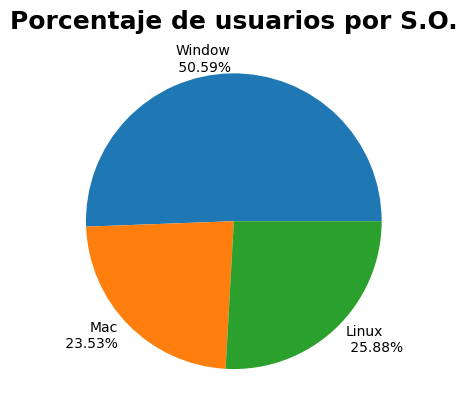

In [15]:
# Gráfico de tortas del porcentaje de usuarios de cada sistema operativo
# Contando los usuarios
clases = np.array([data[data.clase == 0.0].shape[0],
                   data[data.clase == 1.0].shape[0],
                    data[data.clase == 2.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Window\n ' + labels[0]
labels[1] = 'Mac\n ' + labels[1]
labels[2] = 'Linux\n ' + labels[2]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de usuarios por S.O.', fontsize=18, fontweight="bold")
plt.show()

# Visualización los datos

Visualizamos en formato de historial las cuatro características de entrada con nombres “duración”, “páginas”,”acciones” y “valor” podemos ver gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros

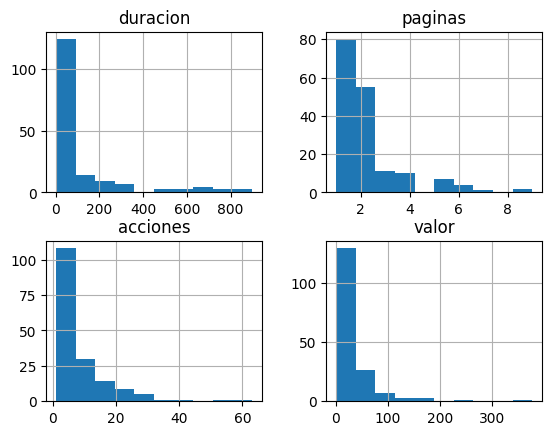

In [ ]:
data.drop(['clase'],axis=1).hist()
plt.show()

# Modelamiento

Cargamos las variables de las 4 columnas de entrada en X excluyendo la columna “clase” con el método drop(). En cambio agregamos la columna “clase” en la variable y. Ejecutamos X.shape para comprobar la dimensión de nuestra matriz con datos de entrada de 170 registros por 4 columnas

In [16]:
X = data.drop(['clase'], axis=1)
y = data['clase']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

Y creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas y

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.

In [ ]:
predictions = model.predict(X_test)
print(predictions[0:5])

[0 0 1 0 0]


Y confirmamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve la precisión media de las predicciones

In [ ]:
model.score(X_test,y_test)

0.7647058823529411

# Evaluación

## Reporte de clasificación

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.60      0.43      0.50         7
           2       0.80      1.00      0.89         8

    accuracy                           0.76        34
   macro avg       0.73      0.74      0.73        34
weighted avg       0.75      0.76      0.75        34



## Matriz de confusión

In [ ]:
# Evaluación del modelo usando la matriz de confusión
matriz = confusion_matrix(y_test, predictions)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[15  2  2]
 [ 4  3  0]
 [ 0  0  8]]


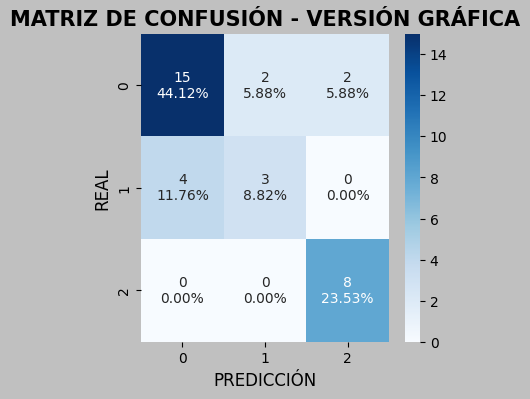

In [ ]:
# Matriz de confusión de forma gráfica
plt.figure(figsize=(4,4),facecolor= 'silver')
clases = {"0" : "Window", "1" : "Mac", "2" : "Linux"}
group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sb.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("MATRIZ DE CONFUSIÓN - VERSIÓN GRÁFICA", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=12)
plt.ylabel("REAL", fontsize=12)
plt.show()

### Explicación de la matriz de confusión

La imagen muestra la estructura de la matriz de confusión:

![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

In [ ]:
# Obtiene el conteo de las predicciones y los valores reales
print(Counter(y_test))
print(Counter(predictions))

Counter({0: 19, 2: 8, 1: 7})
Counter({0: 19, 2: 10, 1: 5})


In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba.shape

(34, 3)

In [ ]:
y_pred_proba

array([[8.59416506e-01, 1.40564902e-01, 1.85921255e-05],
       [4.75646918e-01, 2.92767590e-01, 2.31585492e-01],
       [2.19451182e-01, 7.80548817e-01, 3.63525474e-10],
       [7.37877620e-01, 2.62121942e-01, 4.38278080e-07],
       [5.36644104e-01, 4.63100204e-01, 2.55691522e-04],
       [1.56288334e-01, 8.43711666e-01, 2.75589497e-60],
       [5.96675254e-05, 2.33175216e-05, 9.99917015e-01],
       [2.15974947e-03, 8.25377242e-04, 9.97014873e-01],
       [6.69106757e-01, 3.30779985e-01, 1.13258363e-04],
       [9.85868903e-01, 1.41310973e-02, 1.37605092e-15],
       [2.61441467e-01, 2.94615613e-01, 4.43942920e-01],
       [5.64476979e-01, 4.35523011e-01, 9.20559168e-09],
       [5.76993401e-01, 3.95348342e-01, 2.76582573e-02],
       [7.03840537e-01, 2.96152361e-01, 7.10190340e-06],
       [1.05277168e-02, 3.70590847e-03, 9.85766375e-01],
       [9.85528944e-01, 1.44710557e-02, 8.33655897e-14],
       [2.29567157e-01, 9.58793650e-02, 6.74553478e-01],
       [2.19550235e-01, 9.22583

In [ ]:
cv_results = cross_validate(model, X_train, y_train, cv=5)

In [ ]:
for clave, valor in cv_results.items():
  print(f"{clave:<15}:", valor)

fit_time       : [0.06435513 0.04290771 0.08377218 0.08116198 0.08556223]
score_time     : [0.00213504 0.00214577 0.00240946 0.00222397 0.00216913]
test_score     : [0.78571429 0.74074074 0.77777778 0.77777778 0.7037037 ]


# Predicción - Clasificación de nuevos registros

Como último ejercicio, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

- Tiempo Duración: 10
- Paginas visitadas: 3
- Acciones al navegar: 5
- Valoración: 9

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [ ]:
X_train

,duracion,paginas,acciones,valor
125,11.0,1,2,4
120,11.0,1,3,6
140,11.0,1,2,10
68,230.0,2,12,60
135,12.0,1,10,20
...,...,...,...,...
105,13.0,1,3,18
96,13.0,1,2,16
40,11.0,2,10,40
34,848.0,3,18,54


In [ ]:
model.feature_names_in_

array(['duracion', 'paginas', 'acciones', 'valor'], dtype=object)

In [ ]:
input_array = np.array([10,3,5,9]).reshape(1,-1)
X_data = pd.DataFrame(input_array, columns=model.feature_names_in_)
model.predict(X_data)[0]

2

# Mejora del modelo

**Usando un selector de columnas**

Para mejorar los resultados con este algoritmo. En vez de utilizar todas las columnas de datos de entrada que se tienen, se va a utilizar una Clase de SkLearn llamada **SelectKBest** con la que seleccionaremos las 3 mejores características y se usarán sólo esas.

In [ ]:
X = data.drop(['clase'], axis=1)
y = data['clase']
best = SelectKBest(k=3)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['duracion', 'acciones', 'valor'], dtype='object')


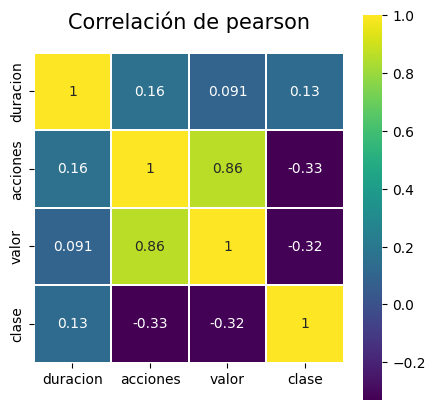

In [ ]:
used_features = X.columns[selected]
features_corr = np.append(used_features, ['clase'])
colormap = plt.cm.viridis
plt.figure(figsize=(5,5))
plt.title('Correlación de pearson', y=1.05, size=15)
sb.heatmap(data[features_corr].astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [ ]:
X = data[used_features]
# Se separan los datos de "train" en entrenamiento y prueba para probar el modelo
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state = 29)
modelo_x = LogisticRegression(solver='lbfgs', max_iter=1000)
# Entrenamiento del modelo
modelo_x.fit(X_train_new, y_train_new)
# Validación del modelo
y_pred = modelo_x.predict(X_test_new)

In [ ]:
matriz_x = confusion_matrix(y_test_new, y_pred)
print('Matriz de Confusión:')
print(matriz_x)

Matriz de Confusión:
[[16  2  1]
 [ 4  3  0]
 [ 0  0  8]]


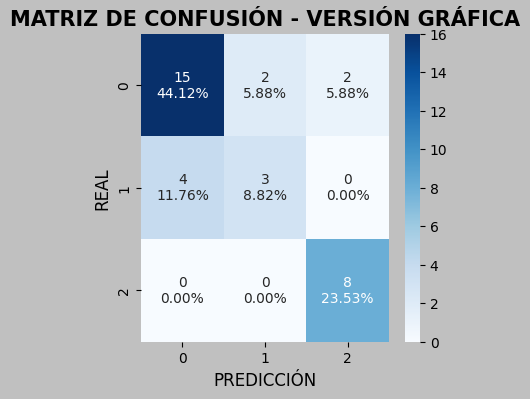

In [ ]:
# Matriz de confusión de forma gráfica
plt.figure(figsize=(4,4),facecolor= 'silver')
clases = {"0" : "Window", "1" : "Mac", "2" : "Linux"}
group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sb.heatmap(matriz_x, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("MATRIZ DE CONFUSIÓN - VERSIÓN GRÁFICA", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=12)
plt.ylabel("REAL", fontsize=12)
plt.show()

In [ ]:
print(classification_report(y_test_new, modelo_x.predict(X_test_new)))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.60      0.43      0.50         7
           2       0.89      1.00      0.94         8

    accuracy                           0.79        34
   macro avg       0.76      0.76      0.75        34
weighted avg       0.78      0.79      0.78        34

